# Data Preparation
Let's start by loading and cleaning the data


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('Car Sales India 2024 (1).xlsx')  
# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       87 non-null     object 
 1   Model      87 non-null     object 
 2   January    87 non-null     int64  
 3   February   87 non-null     object 
 4   March      87 non-null     int64  
 5   April      87 non-null     int64  
 6   May        87 non-null     int64  
 7   June       86 non-null     float64
 8   July       87 non-null     int64  
 9   August     87 non-null     int64  
 10  September  87 non-null     int64  
 11  October    87 non-null     int64  
 12  November   87 non-null     int64  
 13  December   87 non-null     int64  
 14  Total      87 non-null     int64  
 15  Segment    87 non-null     object 
 16  Body Type  87 non-null     object 
 17  MoM %      87 non-null     int64  
 18  YoY %      87 non-null     int64  
dtypes: float64(1), int64(13), object(5)
memory usage: 13

# Data Cleaning

In [15]:
# Clean column names
df.columns = df.columns.str.strip()

# Check for missing values
print(df.isnull().sum())

# Clean numeric columns (remove commas, convert to numeric)
numeric_columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                  'August', 'September', 'October', 'November', 'December']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Calculate total sales if not properly calculated
df['Total'] = df[numeric_columns].sum(axis=1)

# Clean other columns
df['Make'] = df['Make'].str.strip()
df['Model'] = df['Model'].str.strip()
df['Segment'] = df['Segment'].str.strip()
df['Body Type'] = df['Body Type'].str.strip()

# Display cleaned data
print(df.head())

Make         0
Model        0
January      0
February     0
March        0
April        0
May          0
June         1
July         0
August       0
September    0
October      0
November     0
December     0
Total        0
Segment      0
Body Type    0
MoM %        0
YoY %        0
dtype: int64
      Make        Model  January  February  March  April  May   June  July  \
0  Citroen       Basalt        0         0      0      0    0    0.0     0   
1  Citroen           C3      234       211    265    251  155   77.0    90   
2  Citroen     Aircross      231       127    211     93  125  136.0    68   
3  Citroen  C5 Aircross        1         0      0      1    0    0.0     0   
4  Citroen         e-C3      184        83    530     59  235  126.0   177   

   August  September  October  November  December   Total Segment  Body Type  \
0     579        341      221        47        79  1267.0      C2        SUV   
1     507        300      300       200       300  2890.0      C1  Hatchb

# Analysis

1. Highest Selling Car Model

Highest selling model: Tata Punch
Total sales: 202031.0
        Make    Model     Total
70      Tata    Punch  202031.0
49    Maruti   WagonR  190855.0
41    Maruti   Ertiga  190091.0
36    Maruti   Brezza  188160.0
10   Hyundai    Creta  186919.0
48    Maruti    Swift  172808.0
35    Maruti   Baleno  172094.0
39    Maruti    Dzire  167988.0
29  Mahindra  Scorpio  166364.0
69      Tata    Nexon  161611.0


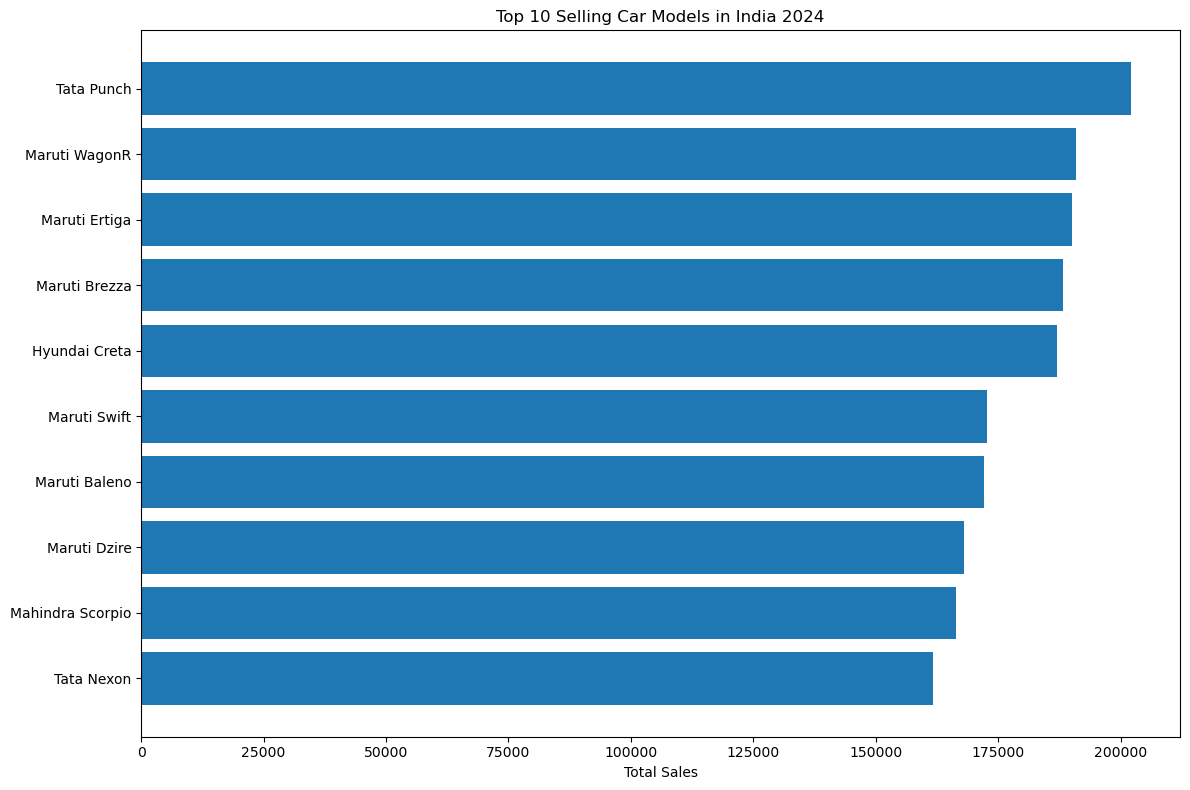

In [16]:
# Find the model with the highest total sales
highest_selling_model = df.loc[df['Total'].idxmax()]
print(f"Highest selling model: {highest_selling_model['Make']} {highest_selling_model['Model']}")
print(f"Total sales: {highest_selling_model['Total']}")

# Top 10 selling models
top_10_models = df.nlargest(10, 'Total')[['Make', 'Model', 'Total']]
print(top_10_models)

# Visualization
plt.figure(figsize=(12, 8))
top_10 = df.nlargest(10, 'Total')
plt.barh(top_10['Make'] + ' ' + top_10['Model'], top_10['Total'])
plt.xlabel('Total Sales')
plt.title('Top 10 Selling Car Models in India 2024')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_10_models.png')
plt.show()

# 2. Month with Highest Sales

Month with highest sales: October
Total sales in October: 397947.0


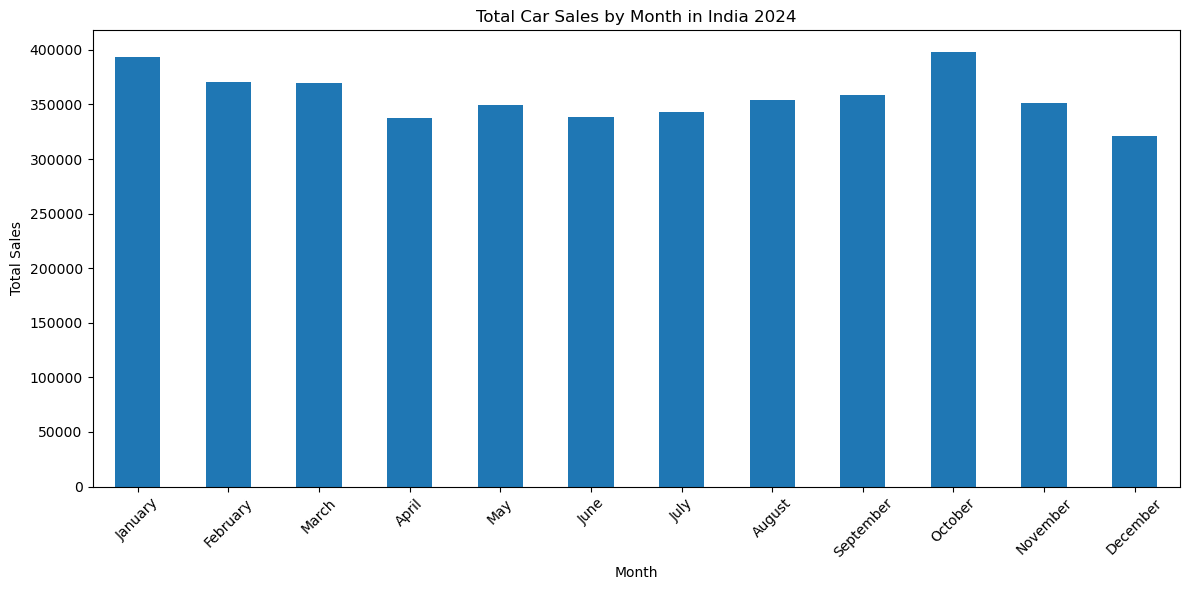

In [17]:
# Calculate total sales by month
monthly_totals = df[numeric_columns].sum()
highest_month = monthly_totals.idxmax()
print(f"Month with highest sales: {highest_month}")
print(f"Total sales in {highest_month}: {monthly_totals[highest_month]}")

# Visualization
plt.figure(figsize=(12, 6))
monthly_totals.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Car Sales by Month in India 2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_by_month.png')
plt.show()

# 3. Additional Insights

In [18]:
# Sales by manufacturer
manufacturer_sales = df.groupby('Make')['Total'].sum().sort_values(ascending=False)
print("Sales by Manufacturer:")
print(manufacturer_sales)

# Sales by segment
segment_sales = df.groupby('Segment')['Total'].sum().sort_values(ascending=False)
print("Sales by Segment:")
print(segment_sales)

# Sales by body type
body_type_sales = df.groupby('Body Type')['Total'].sum().sort_values(ascending=False)
print("Sales by Body Type:")
print(body_type_sales)

Sales by Manufacturer:
Make
Maruti        1753525.0
Hyundai        606133.0
Tata           561102.0
Mahindra       528460.0
Toyota         300159.0
Kia            245000.0
Honda           69872.0
MG              61214.0
Volkswagen      42053.0
Renault         41729.0
Skoda           35157.0
Nissan          29009.0
Citroen          7448.0
Jeep             4206.0
Name: Total, dtype: float64
Sales by Segment:
Segment
C1         1439979.0
C2          823824.0
Utility     659070.0
B2          589952.0
B1          306051.0
D1          269454.0
A           140807.0
D2           46925.0
Premuim       6983.0
Premium       2022.0
Name: Total, dtype: float64
Sales by Body Type:
Body Type
SUV          2161602.0
Hatchback    1062536.0
MUV           713490.0
Sedan         344537.0
Others          2902.0
Name: Total, dtype: float64
